In [1]:
import numpy as np
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_2_3_4_5 import HomoTriangleKnowledgeFactory_2_3_4_5
from mofgbmlpy.main.basic.mofgbml_basic_main import MoFGBMLBasicMain
import tracemalloc

cache_sizes = [0, 1000, 1000, 10000, 100000]
# cache_sizes = [100]
results = np.empty(len(cache_sizes), object)
ram_usage = np.empty(len(cache_sizes), object)
for i in range(len(cache_sizes)):
    print(f"#####\n# Step {i+1} / {len(cache_sizes)}")
    args = [
        # "--data-name", "iris",
        "--data-name", "pima",
        "--algorithm-id", "1",
        "--experiment-id", "2",
        # "--train-file", "../dataset/iris/a0_0_iris-10tra.dat",
        # "--test-file", "../dataset/iris/a0_0_iris-10tst.dat",
        "--train-file", "../dataset/pima/a0_0_pima-10tra.dat",
        "--test-file", "../dataset/pima/a0_0_pima-10tst.dat",        
        "--terminate-generation", "100",
        "--cache-size", f"{cache_sizes[i]}",
        "--objectives", "num-rules", "error-rate",
        # "--crossover-type", "pittsburgh-crossover",
        # "--antecedent-factory", "all-combination-antecedent-factory",
        "--no-plot"
    ]
    tracemalloc.start()

    runner = MoFGBMLBasicMain(HomoTriangleKnowledgeFactory_2_3_4_5)
    
    ram_usage[i] = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    results[i] = runner.main(args)

#####
# Step 1 / 5
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       60 |      7 |             - |             -
     2 |      120 |      5 |  0.4285714286 |         ideal
     3 |      180 |      4 |  0.0512820513 |         ideal
     4 |      240 |     10 |  0.1702127660 |         ideal
     5 |      300 |     18 |  0.2295081967 |         ideal
     6 |      360 |     44 |  0.0114609452 |             f
     7 |      420 |     60 |  0.0317460317 |         ideal
     8 |      480 |     60 |  0.000000E+00 |             f
     9 |      540 |     60 |  0.0735294118 |         ideal
    10 |      600 |     60 |  0.000000E+00 |             f
    11 |      660 |     60 |  0.000000E+00 |             f
    12 |      720 |     60 |  0.0144927536 |         ideal
    13 |      780 |     60 |  0.0800000000 |         ideal
    14 |      840 |     60 |  0.000000E+00 |             f
    15 |      900 |     60 |  0.0004444444 |             f
    16 |      960 |     60 |  0.00088

Execution times:

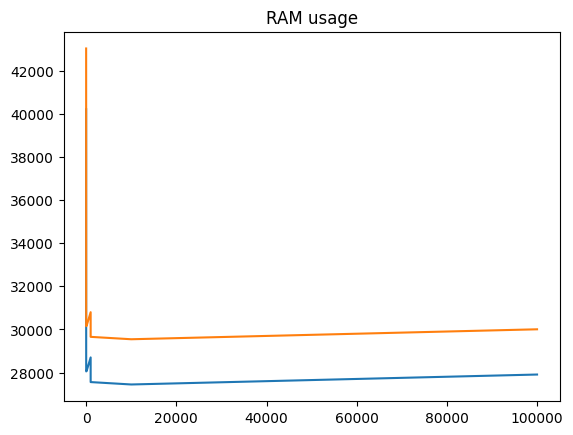

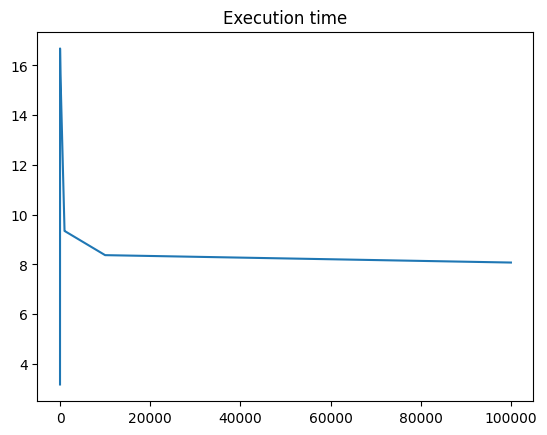

In [2]:
import matplotlib.pyplot as plt

ram_peak_usage_y_current = [r[0] for r in ram_usage]
ram_peak_usage_y_peak = [r[1] for r in ram_usage]
exec_time_y = [r.exec_time for r in results]

plt.plot(cache_sizes, ram_peak_usage_y_current)
plt.plot(cache_sizes, ram_peak_usage_y_peak)
plt.title("RAM usage")
plt.show()
plt.plot(cache_sizes, exec_time_y)
plt.title("Execution time")
plt.show()


Check hash function collisions

In [6]:
for i in range(1, len(cache_sizes)):
    if not np.array_equal(results[i-1].opt.get("X"), results[i].opt.get("X")):
        print(f"result {i-1} is not equal to result {i}")

result 5 is not equal to result 6


In [7]:
arr1 = results[5].opt.get("X")[:,0]
arr2 = results[6].opt.get("X")[:,0]

for i in range(arr1.shape[0]):
    if arr1[i] != arr2[i]:
        print("diff solution")
        print(arr1[i])
        print(arr2[i])
        print("#####")
        for j in range(min(len(arr1[i].get_vars()), len(arr2[i].get_vars()))):
            if arr1[i].get_vars()[j] != arr2[i].get_vars()[j]:
                print("diff rules")
                print(arr1[i].get_vars()[j])
                print(arr2[i].get_vars()[j])
                print("#####")
                for k in range(min(len(arr1[i].get_vars()[j].get_vars()), len(arr2[i].get_vars()[j].get_vars()))):
                    if arr1[i].get_vars()[j].get_vars()[k] != arr2[i].get_vars()[j].get_vars()[k]:
                        print("diff antecedent")
        break

diff solution
(Pittsburgh Solution) Variables: [(Michigan Solution) Variables: [0 0 6 0 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [1 0 0 5 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 8 0 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 12 12 ] Objectives 0.0 ] Attributes: {} ] Objectives 4.0 0.014814814814814815 ] Attributes: {'id': 19717, 'total_coverage': 0.08333333333333333, 'total_rule_length': 6, 'average_rule_weight': 0.6809250761840846, 'training_error_rate': 0.014814814814814815, 'test_error_rate': 0.6666666666666666, 'num_rules': 4}
(Pittsburgh Solution) Variables: [(Michigan Solution) Variables: [0 0 5 0 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 0 6 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 7 0 13 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 12 0 ] Objectives 0.0 ] Attributes: {} ] Objectives 4.0 0.022222222222222223 ] Attributes

In [5]:
results[0].opt.get("X")

array([[(Pittsburgh Solution) Variables: [(Michigan Solution) Variables: [0 0 6 0 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [1 0 0 5 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 8 0 ] Objectives 0.0 ] Attributes: {} (Michigan Solution) Variables: [0 0 12 12 ] Objectives 0.0 ] Attributes: {} ] Objectives 4.0 0.014814814814814815 ] Attributes: {'id': 19717, 'total_coverage': 0.08333333333333333, 'total_rule_length': 6, 'average_rule_weight': 0.6809250761840846, 'training_error_rate': 0.014814814814814815, 'test_error_rate': 0.06666666666666667, 'num_rules': 4}],
       [(Pittsburgh Solution) Variables: [(Michigan Solution) Variables: [0 2 0 6 ] Objectives 0.0 ] Attributes: {} ] Objectives 1.0 0.6666666666666666 ] Attributes: {'id': 19754, 'total_coverage': 1.0, 'total_rule_length': 2, 'average_rule_weight': 1.0, 'training_error_rate': 0.6666666666666666, 'test_error_rate': 0.6666666666666666, 'num_rules': 1}],
       [(Pittsburgh Solution) 

In [ ]:
results[1].opt.get("X")